## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
#from platform import python_version
#print(python_version())
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

In [ ]:
#plt.plot(x_train, y_train, '.')
#print(x_train.shape)
#plt.plot(x_test, y_test, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [3]:
# y = ax + b

def Mean_Square_Error(y, y_pred):
    loss = (y_pred - y) ** 2 / 2
    return np.sum(loss) / len(y)

class Model():
    def __init__(self, x_train, y_train):

        '''
        Initialization
            1. Initialize theta
            2. Migrate input data to 2d array, each data is a vector with size (1, 2)
               The second element is 1
            3. Initialize label to a 2d array, with size (1 * number of data)
        '''
        self.theta = np.random.normal(loc=0, scale=1, size=(1, 2))

        self.x_train = np.ones(shape=(x_train.shape[0], 2)) 
        self.x_train[:, 0:1] = x_train
        
        self.y_train = np.zeros(shape=(1, y_train.shape[0]))
        self.y_train[0] = y_train

        self.loss = []

    def predict(self, x):
        '''
        for each data in x, use theta to dot x and get prediction
        '''
        x = x.transpose()
        return self.theta @ x 

    def GD(self, y_pred):
        '''
        Gradient = loss * x * 1/n
        loss is the difference between prediction and ground truth
        return the result of gradient calculated from each data
        '''
        loss = y_pred - self.y_train
        x_train = self.x_train.transpose()
        gd_vector = np.zeros(shape=x_train.shape)
        #print(loss.shape)
        #print(gd_vector.shape)

        for i in range(gd_vector.shape[0]):
            gd_vector[i] = loss * x_train[i]

        gd_vector = gd_vector / gd_vector.shape[1]
        return gd_vector

    def train(self, epochs=100, lr=0.01):

        for _ in range(epochs):
            '''
            Update theta using gradient descent
            '''
            y_pred = self.predict(self.x_train)
            gd_vector = self.GD(y_pred)
            gd_value = np.sum(gd_vector, axis=1)

            self.theta -= gd_value * lr
            self.loss.append(Mean_Square_Error(y_train, y_pred))

    def test(self, x):
        x_test = np.ones(shape=(x.shape[0], 2))
        #print(x.shape)
        #print(x_test.shape)
        x_test[:, 0:1] = x
        #print(x_test)
        return self.predict(x_test)

model = Model(x_train, y_train)
model.train(100, 0.1)

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

MSE Error = 55.21428990773452
MSE Intercept = -0.3342019804580061, slope = 52.74041996589738


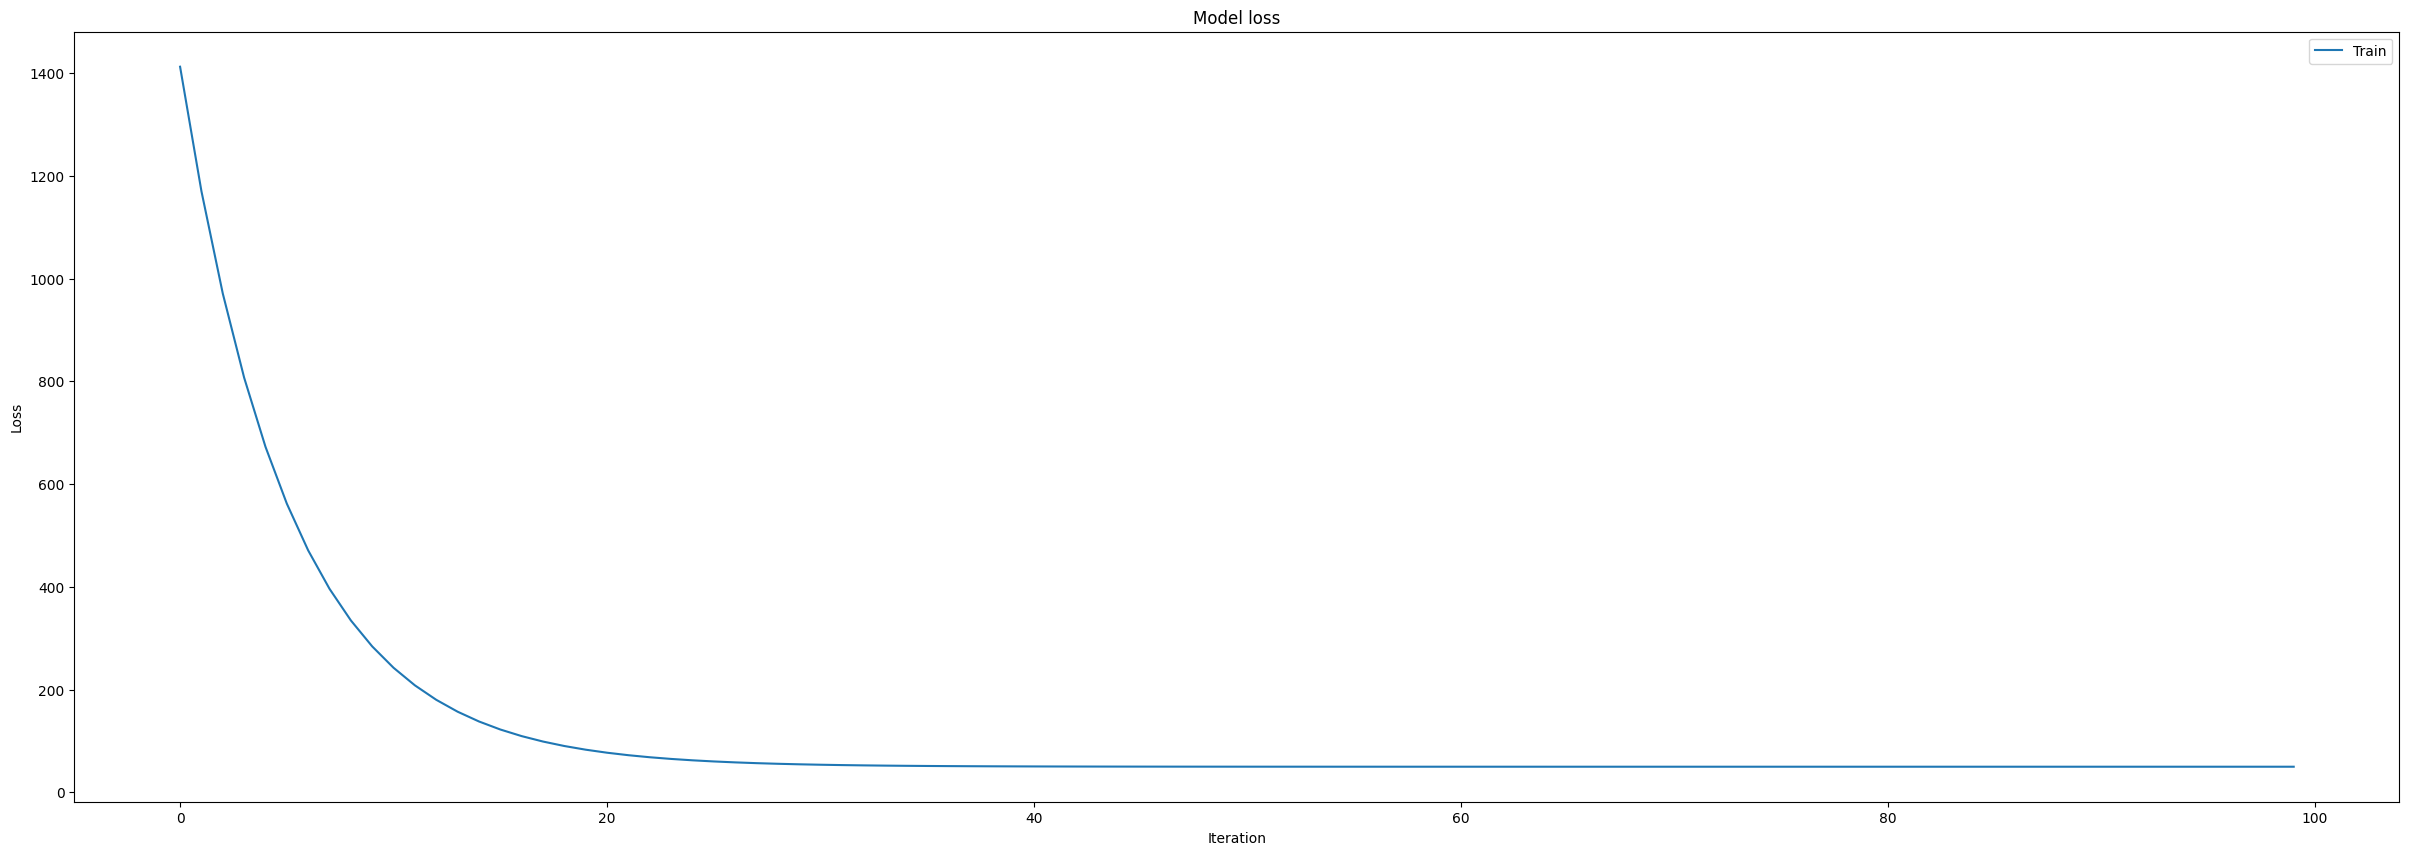

In [4]:
y_pred = model.test(x_test)
#print(y_pred.shape)
#print(y_test.shape)
print("MSE Error = ", end='')
print(Mean_Square_Error(y_test, y_pred))


#plt.plot(x_train, y_train, '.')

#axes = plt.gca()
#x_vals = np.array(axes.get_xlim())
#y_vals = model.theta[0][1] + model.theta[0][0] * x_vals
#plt.plot(x_vals, y_vals, '-')

print("MSE Intercept = {intercept}, slope = {slope}".format(intercept=model.theta[0][1], slope=model.theta[0][0]))

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot(model.loss)
ax.set_title("Model loss")
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.legend(["Train"], loc="upper right") 


# Part 2. Logistic regreesion model

## Load classification data

In [5]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [ ]:
#plt.scatter(x_train, np.ones_like(x_train), c=y_train)
#print(x_train)
#print(y_train)
#plt.plot(x_train, y_train, '.')

BCE Intercept = 1.2993035466238414, slope = 4.196290759554965
BCE Error = 45.37350609389448


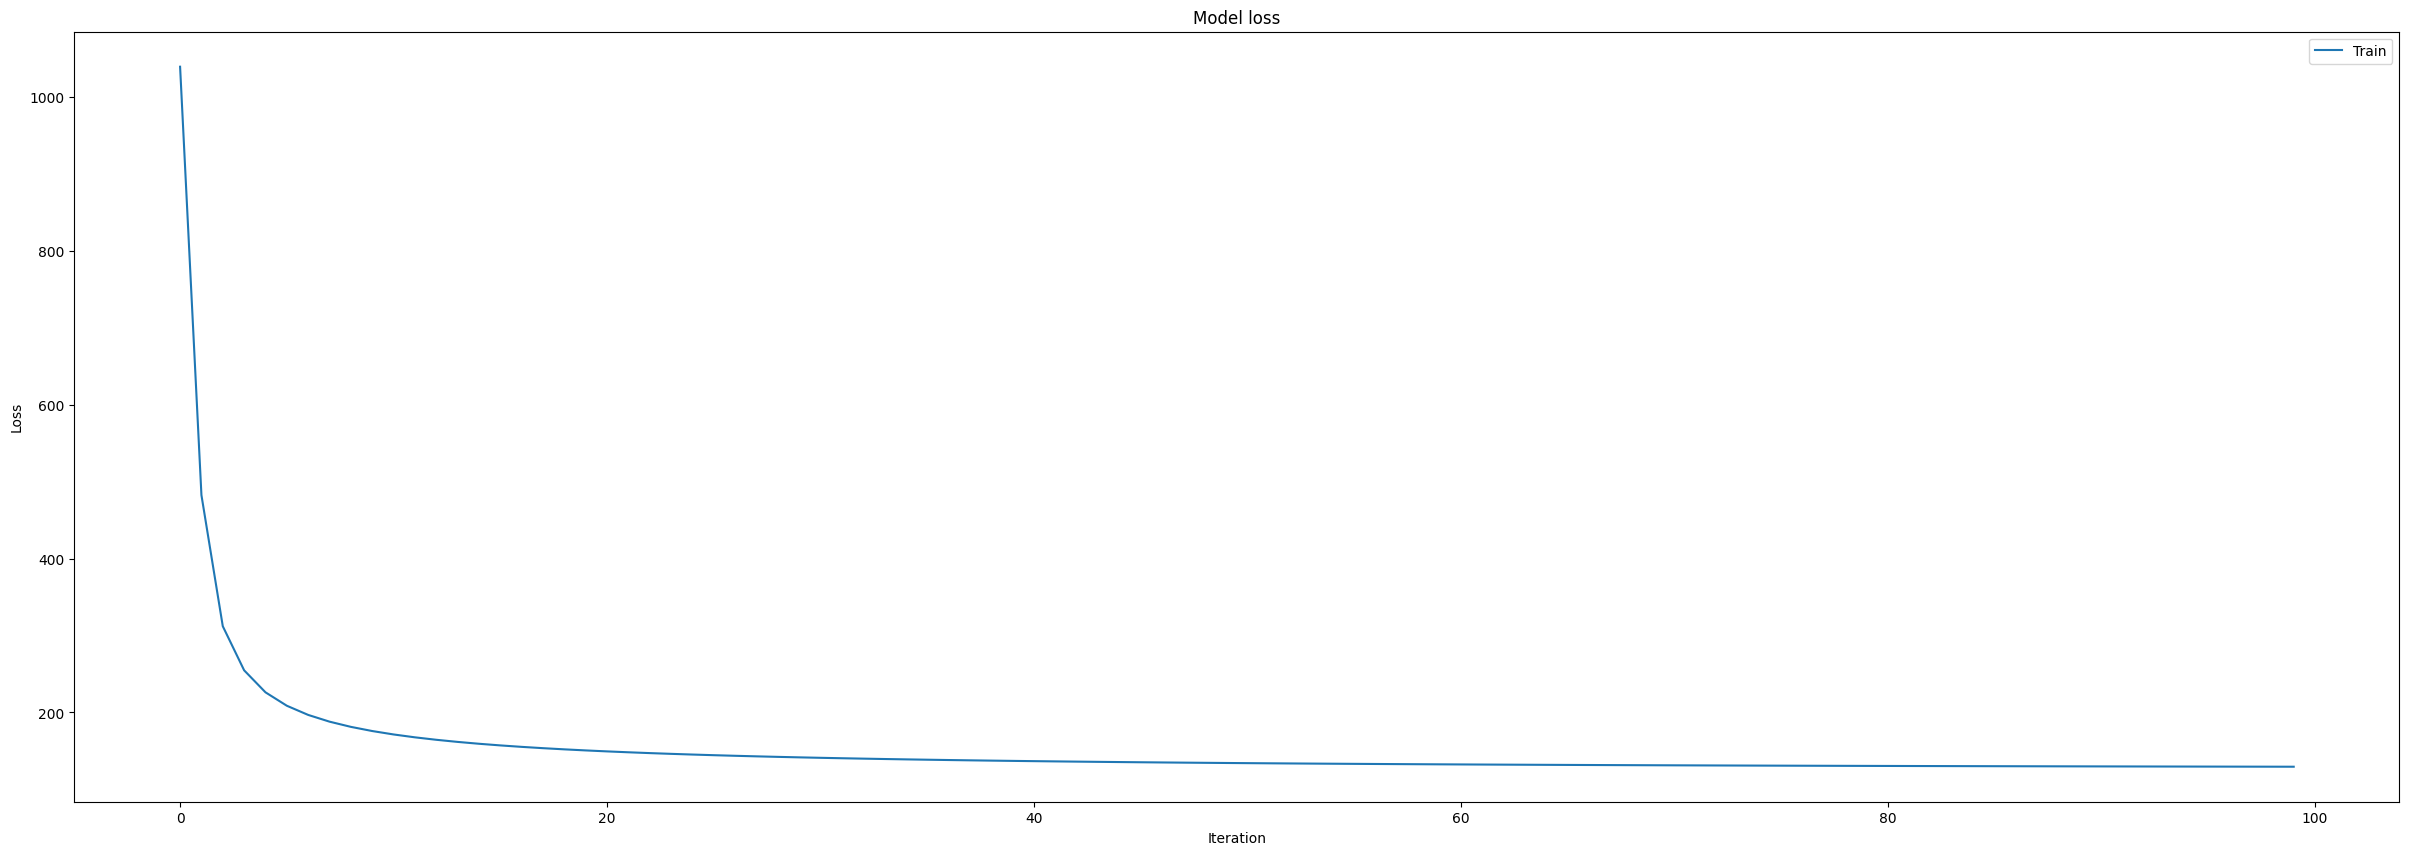

In [6]:
# y = ax + b

def Cross_Entropy_Error(y, y_pred):
    error = np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    error = error * -1
    #print(error)
    return error
    

class Model():
    def __init__(self, x_train, y_train):
        '''
        Initialization
            1. Initialize theta
            2. Migrate input data to 2d array with size (number of data * 2), each data is a vector with size (1, 2)
               The second element is 1
            3. Initialize label to a 2d array, with size (1 * number of data)
        '''

        self.theta = np.random.normal(loc=0, scale=1, size=(1, 2))

        self.x_train = np.ones(shape=(x_train.shape[0], 2))
        self.x_train[:, 0:1] = x_train
        #print(self.x_train.shape)   # (750, 2)

        self.y_train = np.zeros(shape=(1, y_train.shape[0]))
        self.y_train[0] = y_train
        #print(self.y_train.shape)   # (1, 750)

        self.loss = []

    def Linear_Comb(self, x):
        '''
        Dot product between theta and x
        '''
        x = x.transpose()
        return self.theta @ x

    def Sigmoid(self, x):
        '''
        First get result of theta dot x
        Then use the result as input of sigmoid function
        '''
        prob_vector = self.Linear_Comb(x)
        #print(prob_vector.shape)
        prob_vector = 1.0 / (1.0 + np.exp(-1 * prob_vector))    # sigmoid function
        
        return prob_vector

    def GD(self, y_pred):
        '''
        Gradient = loss * x * 1/n
        loss is the difference between prediction and ground truth
        return the result of gradient calculated from each data
        '''

        loss = y_pred - self.y_train
        x_train = self.x_train.transpose()
        gd_vector = np.zeros(shape=x_train.shape)
        #print(loss.shape)
        #print(gd_vector.shape)

        for i in range(gd_vector.shape[0]):
            gd_vector[i] = loss * x_train[i]

        return gd_vector

    def train(self, epochs=100, lr=0.01):

        for _ in range(epochs):
            '''
            Update theta using gradient descent
            '''
            
            y_pred = self.Sigmoid(self.x_train)
            sgd_vector = self.GD(y_pred)
            sgd_value = np.sum(sgd_vector, axis=1)
            
            self.theta -= sgd_value * lr
            self.loss.append(Cross_Entropy_Error(self.y_train, y_pred))

    def test(self, x):
        x_test = np.ones(shape=(x.shape[0], 2))
        #print(x.shape)
        #print(x_test.shape)
        x_test[:, 0:1] = x
        #print(x_test)
        y_pred = self.Sigmoid(x_test)
        return y_pred

model = Model(x_train, y_train)
#model.Sigmoid(model.x_train)
model.train(100, 0.002)
print("BCE Intercept = {intercept}, slope = {slope}".format(intercept=model.theta[0][1], slope=model.theta[0][0]))

y_pred = model.test(x_test)
print("BCE Error = ", end='')
print(Cross_Entropy_Error(y_test, y_pred))

#y_tmp = np.zeros(len(y_test))
#y_tmp = [1 if y_pred[0][i] >= 0.5 else 0 for i in range(len(y_tmp))]
#plt.plot(x_test, y_tmp, '.', color='green')
#plt.plot(x_test, y_test, '.', color='orange')

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot(model.loss)
ax.set_title("Model loss")
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.legend(["Train"], loc="upper right")

#plt.scatter(x_test, np.ones_like(x_train), c=y_test)